## The most library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [20]:
# read data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1->diabete
### 0->non diabete

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


`all datatypes is correct`

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


`we notice there are some column have min value is 0 and in natural that's impossible such as(Glucose, BloodPressure, SkinThickness, Insulin, BMI) so we will replace it with nan value` 

In [29]:
df.loc[:, :'Age']= df.drop(labels='Outcome', axis=1).replace(0, np.nan)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


# Data Exploarty

In [43]:
out = df['Outcome'].value_counts(normalize=True)*100

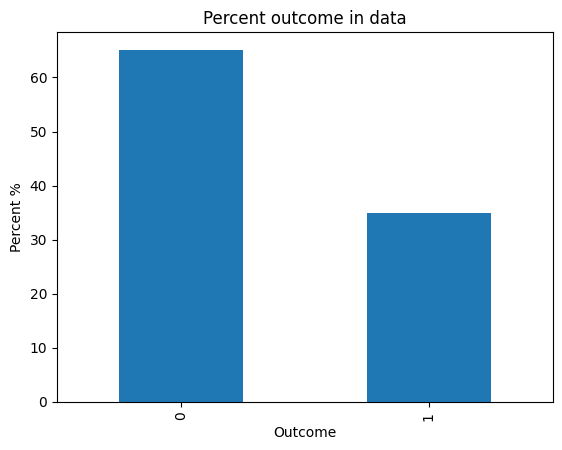

In [46]:
out.plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Percent %')
plt.title('Percent outcome in data')
plt.show()

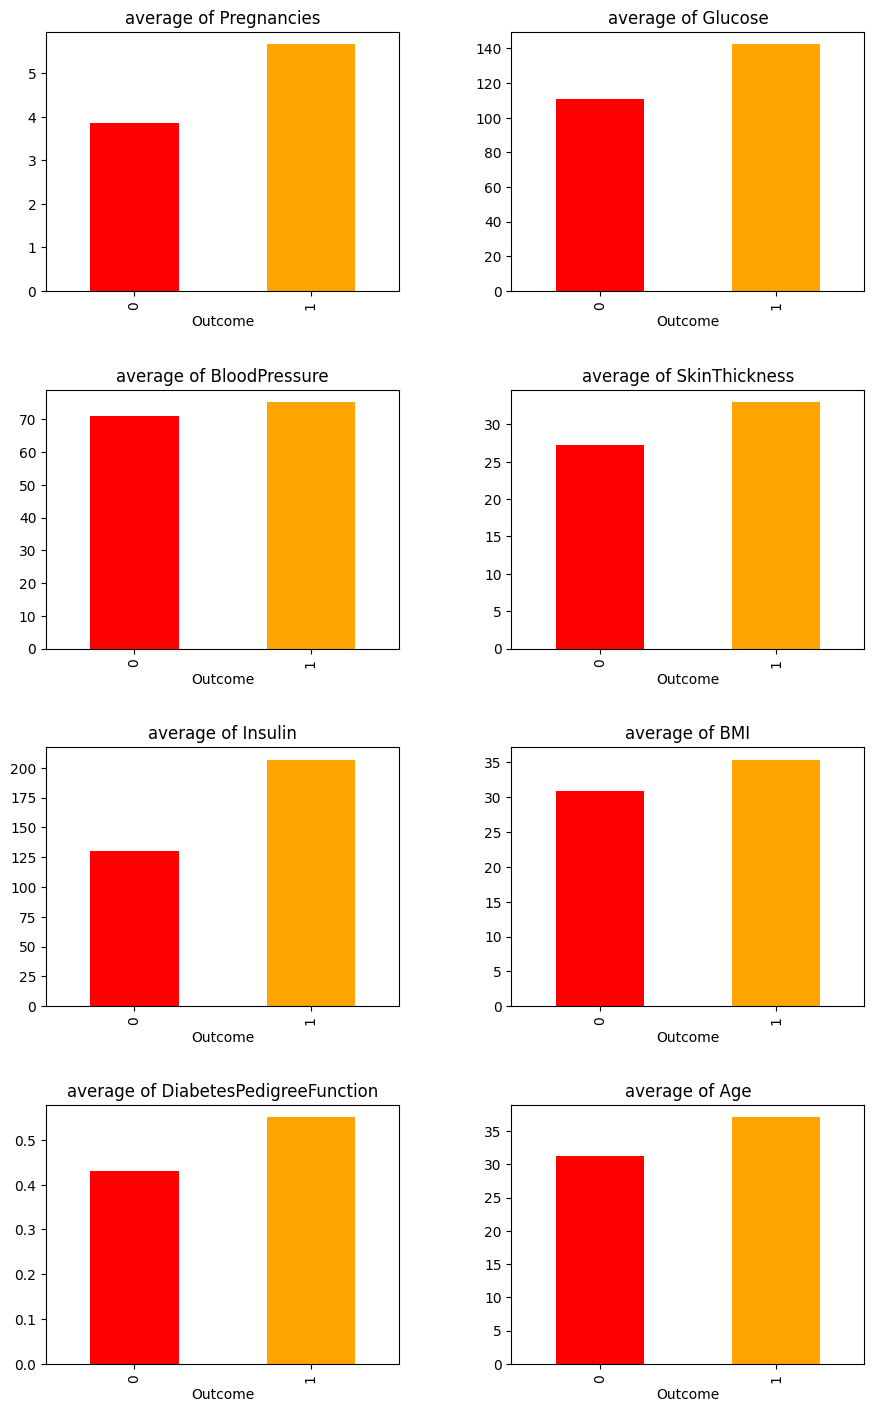

In [90]:
fig, ax = plt.subplots(4, 2, figsize=(10, 15))
fig.tight_layout(pad=5)
col = df.columns[:-1]
col = np.array(col).reshape(4,2)
for rows in range(4):
    for cols in range(2):
        res = df.groupby('Outcome')[col[rows, cols]].mean()
        plt.sca(ax[rows, cols])
        res.plot(kind='bar', color=['red', 'orange'])
        plt.title('average of '+col[rows, cols])


`we see that the people have high insulin and the woman have 5 pregnancies and have Glucose 140 are diabete`

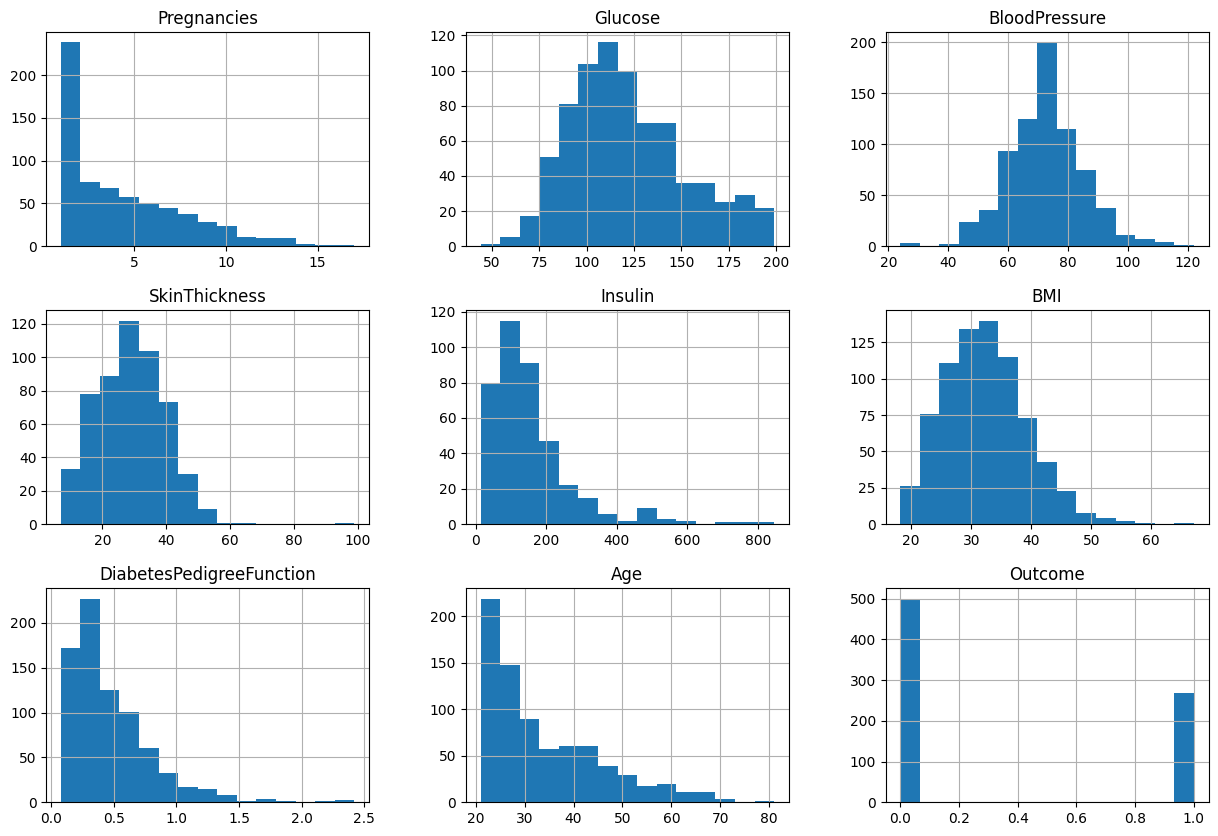

In [86]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

`there are more of data is skwness we must tranform it before enter it to model`

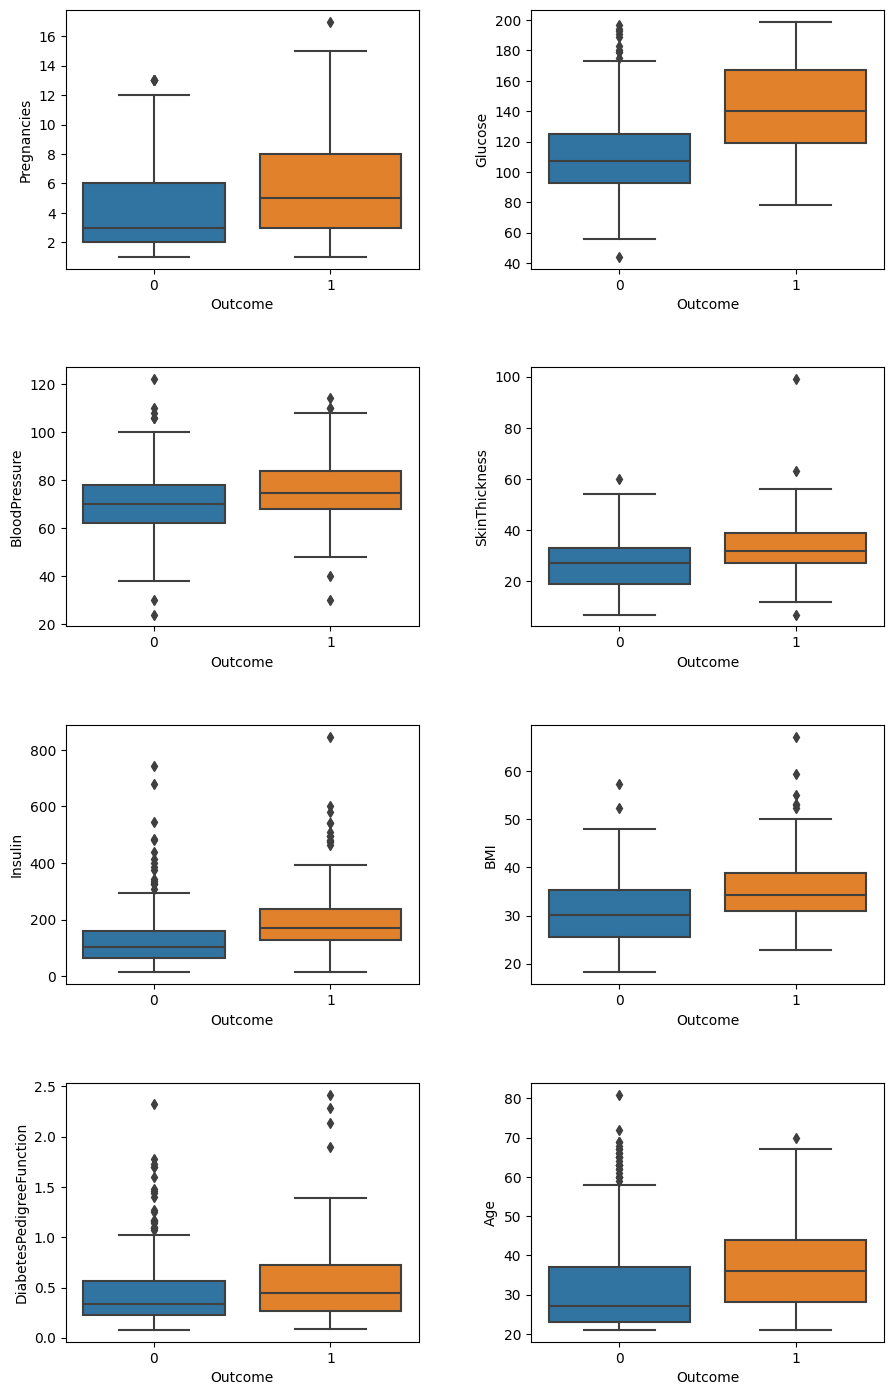

In [91]:
#see distribution of data with target
fig, ax = plt.subplots(4, 2, figsize=(10, 15))
fig.tight_layout(pad=5)
col = df.columns[:-1]
col = np.array(col).reshape(4,2)
for rows in range(4):
    for cols in range(2):
        plt.sca(ax[rows, cols])
        sns.boxplot(x='Outcome', y=col[rows, cols], data=df,)
        


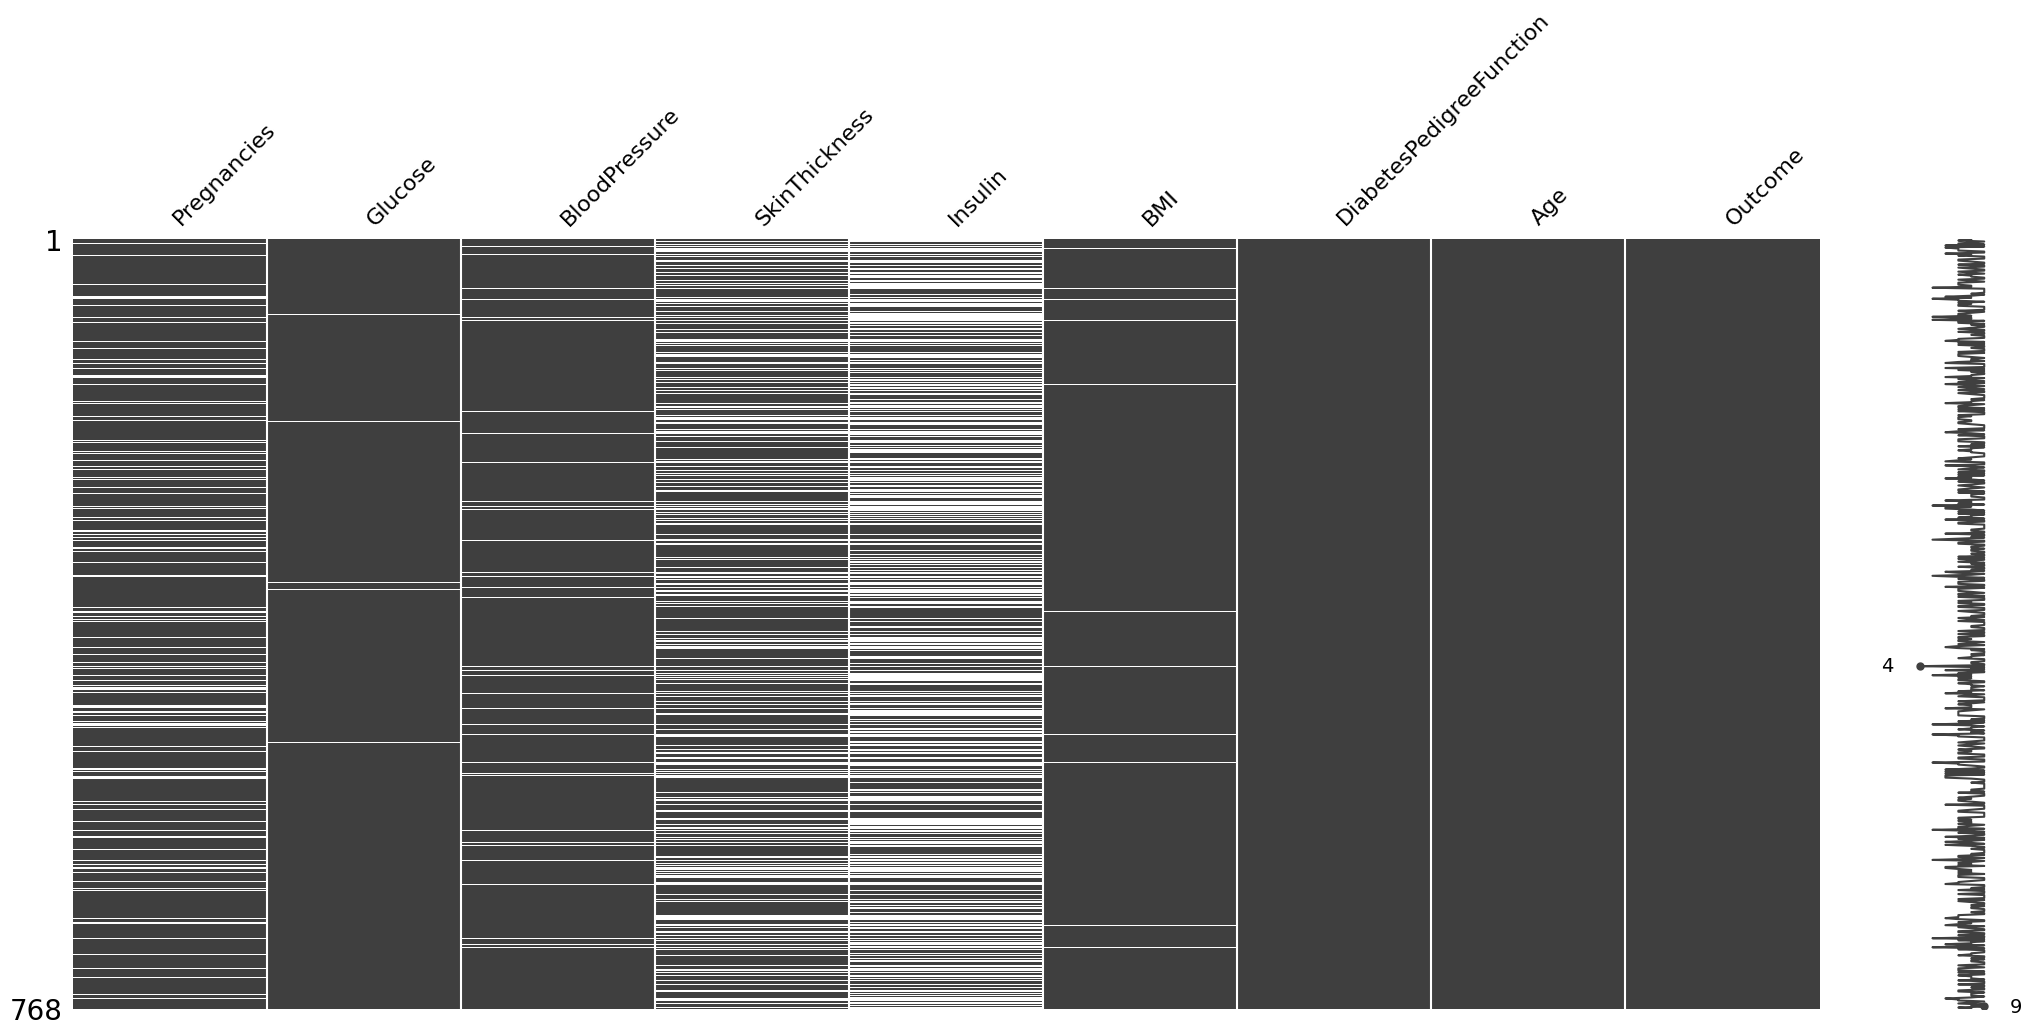

In [93]:
# see missing data
msno.matrix(df);

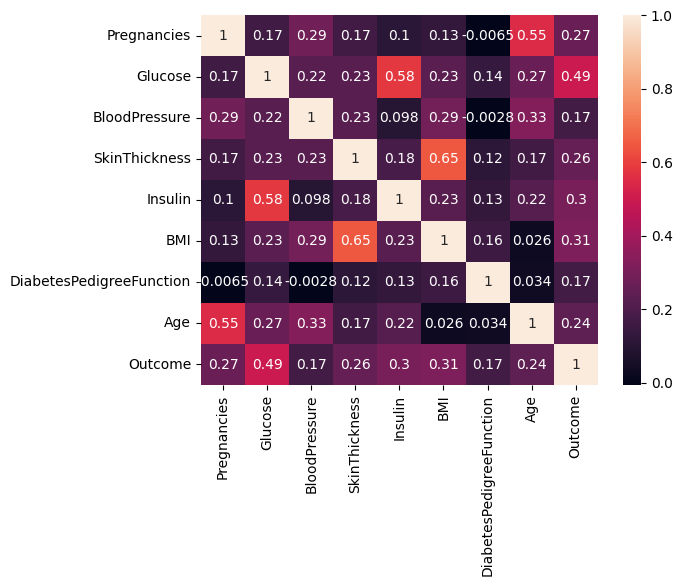

In [96]:
sns.heatmap(df.corr(), annot=True);

`Glucose is the most effect on target`